##### Project ini belum sepenuhnya selesai dikarenakan info mendadak terkait perubahan schedule upload file. Masih dalam tahap hyper tunning. Oleh karena itu kesimpulan yang dibuat dalam file ini masih bersifat sementara.

Framework - FinalProject
1. Define Problem
2. Define Goals
3. Data Collect & Import
4. Cek Missing Value
5. Describe Data
6. EDA -- Handling Missing Value
7. Feature Engineering -- Handling Outliers
8. Export file finalProject Fix
9. Handling Imbalance Data
--------------------------------------------
10. Train with Base Algorithm
11. Train with Complex Algorithm
12. Train Base with Hyper param
13. Train Complex with Hyper param
--------------------------------------------
14. Classification Report
15. Confusion Matrix
16. Evaluation Model (Score Dibuat DataFrame)
--------------------------------------------
17. Memilih Model
18. Export Model
19. Dashboard (Joblib/Pickle)

## ----------------------------- *Udemy_Course (Online Course Bussines)* -----------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

# (1-2) Definition, Problems, and Goals

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

Machine Learning ini merupakan salah satu model untuk menentukan sukses tidak nya suatu course yang akan dibuka oleh suatu Lembaga Pendidikan atau dalam problem ini ialah MOOC, yang dapat digunakan oleh perusahaan atau lembaga tersebut sebagai bahan pertimbangan dalam me-*release* course baru.

### Problems & Goals

2.1 Problems
- Kualitas Pendidikan Menurun saat diterapkannya Sistem Pendidikan Jarak Jauh berbasis Teknologi (mediaindonesia.com)
- Penurunan partisipan pada Lembaga-lembaga Bimbingan Belajar akibat Covid-19 (sonora.id)
- Kesulitan dalam mencari pekerjaan akibat pandemi covid, sehingga memiliki skill-skill yang bagus dapat menjadi nilai jual utama. Sehingga course2 dari lembaga-lembaga pendidikan non-formal akan banyak dicari
- Kesulitan untuk mengetahui course apa yang paling dibutuhkan mereka-mereka yang sedang ingin improving skill

2.2 Goals
- Membuat model yang dapat memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan
- Mengetahui variabel apa saja yang dapat mempengaruhi sukses/tidaknya suatu course dalam mendapatkan subscribers atau partisipan

2.3 Limitasi
- Model dapat digunakan oleh seluruh perusahaan berbasis Platform Media Pembelajaran Online / MOOC / Bimbel dan perusahaan sejenis lainnya.
- Model hanya dapat memprediksi persentase sukses atau tidaknya course yang akan dibuka.


# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler,power_transform, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

------------------------------------------------------------------------------------------------------------------------------------------------------

# (3) Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('udemy.csv', parse_dates=['published_timestamp'])
df1 = df.copy()
df1['content_duration'] = round(df1['content_duration'],2)

In [3]:
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


------------------------------------------------------------------------------------------------------------------------------------------------------

# (4) Cek Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
df1.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

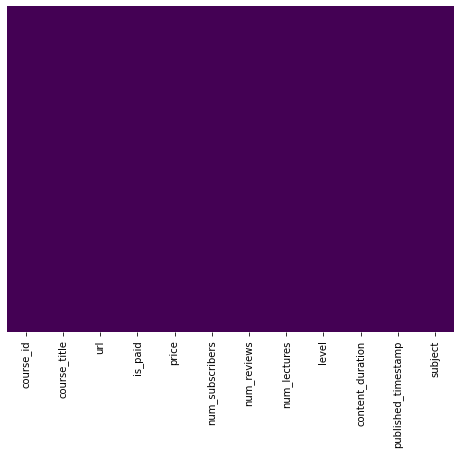

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

- **Tidak terdapat null, sehingga Handling Missing Value tidak perlu dilakukan**

------------------------------------------------------------------------------------------------------------------------------------------------------

# (5) Describe Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Variabel

- course_id: ID setiap jenis course
- course_title: Nama Course
- url: url dari course_title
- is paid: Tipe Course (Gratis / Berbayar)
- price: Harga course (dalam satuan USD)
- num_subscriber: Jumlah subscriber atau student
- num_reviews: Jumlah subscriber atau partisipan yang memberikan review
- num_lectures: Jumlah instruktur
- level: Level course 
- content_duration: Durasi konten dari satu course nya (dalam satuan hours)
- published_timestamp: Keterangan waktu perilisan course
- subject: Kategori course

Berdasarkan kolom-kolom di atas, belum terdapatnya kolom target (sukses/tidak). Oleh karena itu, kolom target Sukses/Tidak Sukses akan di buat di tahap Feature Engineering berdasarkan Jumlah Subscriber. 

In [8]:
df1.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
df1.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [10]:
tab_desc1 = df1.describe().T
tab_desc1

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094527,6.053835,0.0,1.0,2.0,4.50,78.5


In [11]:
tab_desc2 = df1.describe(include='O').T
tab_desc2

,count,unique,top,freq
course_title,3678,3663,Acoustic Blues Guitar Lessons,3
url,3678,3672,https://www.udemy.com/essentials-of-money-value/,2
level,3678,4,All Levels,1929
subject,3678,4,Web Development,1200


In [12]:
dfDesc = []
for i in df1.columns:
    dfDesc.append([
        i,
        df1[i].dtypes,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1)*100),2),
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [13]:
tab_desc3 = pd.DataFrame(dfDesc, columns=['Feature','dtypes','null','null%','nunique','sample'])
tab_desc3

,Feature,dtypes,null,null%,nunique,sample
0,course_id,int64,0,0.0,3672,"[797040, 904240]"
1,course_title,object,0,0.0,3663,"[Learn Laravel: Create Your Web App Step-By-Step, Stop Creditors from Harassing you and Avoid Bankruptcy]"
2,url,object,0,0.0,3672,"[https://www.udemy.com/learn-to-program-javascript-in-ten-easy-steps/, https://www.udemy.com/beginner-guitar-masterclass/]"
3,is_paid,bool,0,0.0,2,"[False, True]"
4,price,int64,0,0.0,38,"[190, 180]"
5,num_subscribers,int64,0,0.0,2197,"[5830, 867]"
6,num_reviews,int64,0,0.0,511,"[989, 650]"
7,num_lectures,int64,0,0.0,229,"[384, 183]"
8,level,object,0,0.0,4,"[Intermediate Level, Beginner Level]"
9,content_duration,float64,0,0.0,105,"[20.5, 22.5]"


- Course ID dan Course title tidak sama jumlah nunique nya. Kemungkinan ada beberapa course title yang terduplikasi
- Selain itu, jumlah data ialah 3678, sedangkan course_id dan url hanya 3672. **Ada sejumlah data memiliki course_id yang sama**
- Jumlah Course_title ternyata lebih sedikit lagi dibandingkan course_id dan url. **Artinya ada beberapa course yg course_title nya sama**

In [14]:
df1.course_title.value_counts().head()

Acoustic Blues Guitar Lessons                             3
Creating an animated greeting card via Google Slides      3
Aprende a tocar el acordeón de botones                    2
MicroStation - Células                                    2
Learn Web Designing & HTML5/CSS3 Essentials in 4-Hours    2
Name: course_title, dtype: int64

In [15]:
df1[df1.course_title=='Creating an animated greeting card via Google Slides']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1301,692920,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides/,True,20,1504,10,9,Beginner Level,1.5,2016-01-05 20:31:49+00:00,Graphic Design
1334,699376,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-2/,True,20,549,10,8,Beginner Level,1.0,2016-04-12 01:24:14+00:00,Graphic Design
1447,699380,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-3/,True,20,770,8,8,Intermediate Level,1.0,2016-05-06 15:54:32+00:00,Graphic Design


In [16]:
id_duplikat = df1.course_id.value_counts().head(6).index
index_loc = []
for i in id_duplikat:
    index_loc.append([
        i,
        df1.index[df1.course_id==i]
    ])

In [17]:
tab_desc4 = pd.DataFrame(index_loc, columns=['course_id', 'loc_index'])
tab_desc4

,course_id,loc_index
0,185526,"Int64Index([1234, 1473], dtype='int64')"
1,1084454,"Int64Index([463, 1100], dtype='int64')"
2,837322,"Int64Index([453, 787], dtype='int64')"
3,28295,"Int64Index([2478, 2561], dtype='int64')"
4,1035638,"Int64Index([778, 894], dtype='int64')"
5,1157298,"Int64Index([454, 788], dtype='int64')"


- Setiap course yang sama tersebut akan didrop salah satunya

In [18]:
tab_desc5 = df1[(df1.course_id==185526) | (df1.course_id==1084454)]
tab_desc5

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design


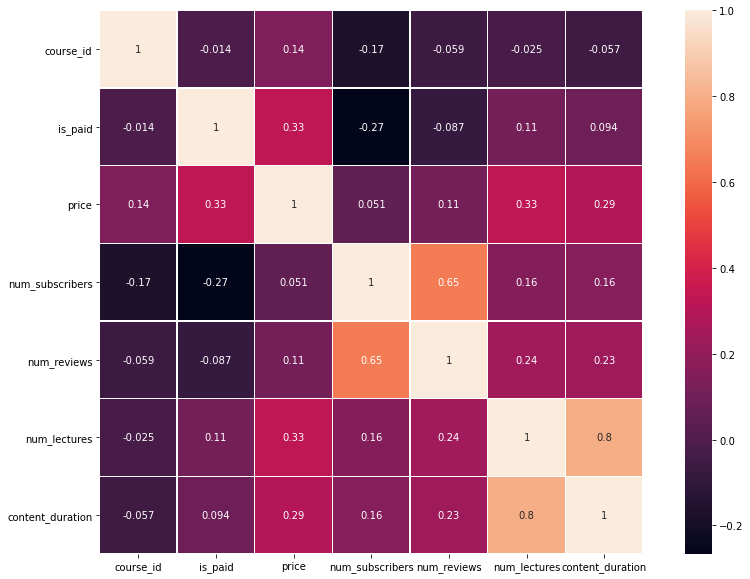

In [19]:
plt.figure(figsize=(15, 10))

sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
plt.show()

- Hipotesis awal variabel yang berhubungan dengan **Jumlah Subscribers** berdasarkan nilai korelasi tertinggi

1. Jumlah Reviews
2. Paid or not
3. Content duration
4. Jumlah Lectures

------------------------------------------------------------------------------------------------------------------------------------------------------

# (6) EDA without Handling Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

## a. Analisa 1 variabel (Persebaran Data)

##### a1. Subscribers

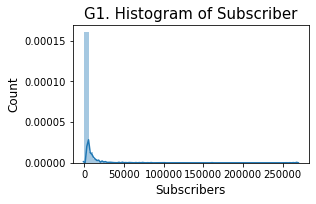

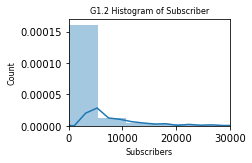

In [20]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.distplot(df1.num_subscribers, bins=50)
plt.title('G1. Histogram of Subscriber', fontsize=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Subscribers', fontsize=12)
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

plt.subplot(2,2,2)
sns.distplot(df1.num_subscribers, bins=50)
plt.title('G1.2 Histogram of Subscriber', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.xlabel('Subscribers', fontsize=8)
plt.xlim(0,30000)
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Berdasarkan Grafik G1, bentuk histogram jumlah subscriber merupakan skewness positif. Skewness yang bernilai positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Sebagian besar distribusi berada di nilai rendah. Artinya, kemungkinan **Jumlah persebaran data subscriber sebagian besar pada jumlah 0 sampai ± 30000**

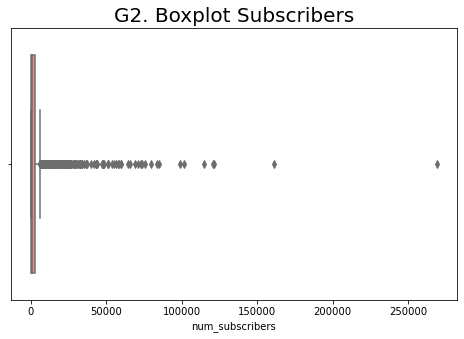

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_subscribers, color='salmon')
plt.title('G2. Boxplot Subscribers', fontsize=20)
plt.show()

- Grafik G2 menunjukan bahwa **sebagian besar Persebaran Data berada pada rentang jumlah subscriber yang kecil**

In [22]:
uf_subs = (1.5*(df1.num_subscribers.quantile(0.75)-df1.num_subscribers.quantile(0.25))) + df1.num_subscribers.quantile(0.75)
b=df1.num_subscribers[df1.num_subscribers<=uf_subs]

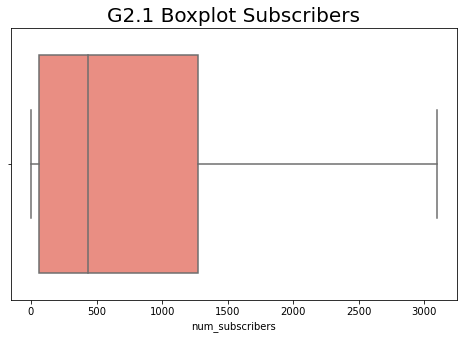

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_subscribers[df1.num_subscribers<=3100], color='salmon')
plt.title('G2.1 Boxplot Subscribers', fontsize=20)
plt.show()

- Sebagian besar persebaran data yang dimaksud Grafik G2 ditunjukan pada grafik ini, yaitu hanya pada rentang jumlah subscriber 0 sampai 3102

In [24]:
a = df1.num_subscribers.value_counts().head(10)
tab_eda1 = pd.DataFrame(a)

In [25]:
tab_eda1['Num_Sub'] = tab_eda1.index
index = np.arange(1,11)
tab_eda1['index'] = index
tab_eda1.rename(columns={"num_subscribers":"Jumlah Data"}, inplace=True)

In [26]:
newcol = ['Num_Sub','Jumlah Data','index']
tab_eda1 = tab_eda1[newcol]
tab_eda1 = tab_eda1.set_index(index)
tab_eda1.drop(columns='index',inplace=True)
tab_eda1

,Num_Sub,Jumlah Data
1,0,70
2,1,49
3,5,28
4,2,27
5,4,26
6,3,26
7,7,24
8,11,23
9,13,19
10,6,18


- Tabel tab_eda1 di atas merupakan **jumlah 10 data course tertinggi** dari **setiap number subscribers**
- Contoh pembacaan : Ada sejumlah 70 course yang memiliki subscriber 0

In [27]:
feature_num = df1[['num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'price', 'subject', 'level']]
for i in feature_num:
    if feature_num[i].dtype in ['object','bool']:
        pass
    elif i == 'price':
        pass
    else:
        feature_num[i +'_log'] = np.log(feature_num[i] + 1)
log_feature = [f for f in feature_num.columns if '_log' in f]

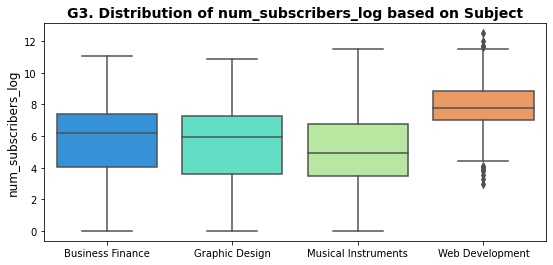

In [28]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_subscribers_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G3. Distribution of num_subscribers_log based on Subject', fontsize=14, weight='bold')
plt.show()

- Berdasarkan grafik G3, **Web Development** adalah course yang paling banyak diikuti, disusul Business Finance, Graphic Design, dan Musical Instruments.
- Masing-masing subject memiliki data yang tidak simetris

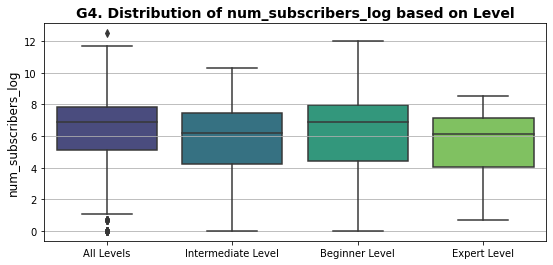

In [29]:
plt.figure(figsize=(9,4))
plt.grid()
ax = sns.boxplot(x='level', y='num_subscribers_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_subscribers_log', fontsize=12)
ax.set_title('G4. Distribution of num_subscribers_log based on Level', fontsize=14, weight='bold')
plt.show()

- Sebagian besar course banyak tersedia pada All level dan Beginner
- Expert Level merupakan yang paling sedikit

##### a2. Num_reviews

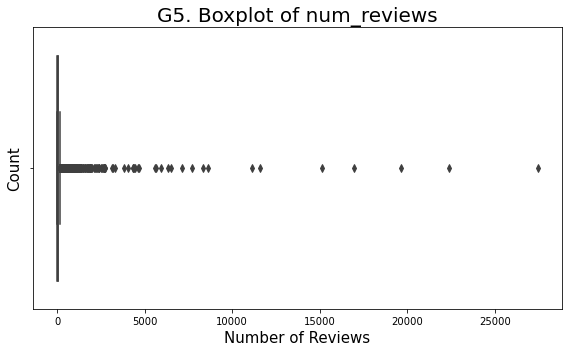

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_reviews)
plt.title('G5. Boxplot of num_reviews', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Sebagian besar data berdasarkan grafik G5, memiliki jumlah review yang sedikit

In [31]:
uf_review = (1.5*(df1.num_reviews.quantile(0.75)-df1.num_reviews.quantile(0.25))) + df1.num_reviews.quantile(0.75)
df1.num_reviews[df1.num_reviews>uf_review].count()

494

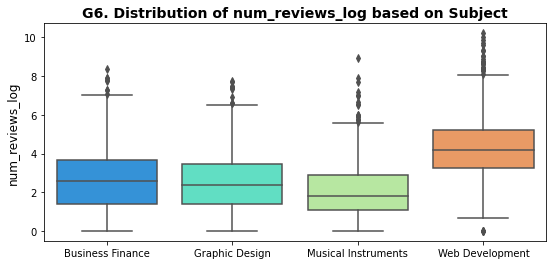

In [32]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='num_reviews_log', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G6. Distribution of num_reviews_log based on Subject', fontsize=14, weight='bold')
plt.show()

- Web Development memiliki data jumlah review yang cukup simetris, artinya memang sebagian besar data pada subject Web Development memiliki rata2 jumlah review yang tinggi. Berbeda dengan 3 lainnya yang tidak simetris.

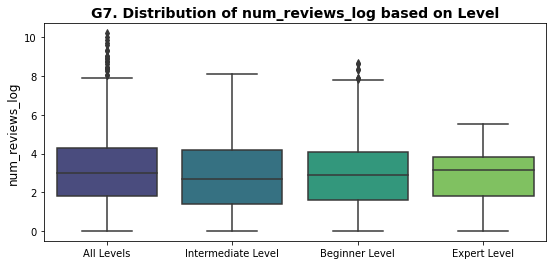

In [33]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='num_reviews_log', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('num_reviews_log', fontsize=12)
ax.set_title('G7. Distribution of num_reviews_log based on Level', fontsize=14, weight='bold')
plt.show()

- Sebagian besar course pada semua jenis level berada pada rentang jumlah review yang kecil/sedikit

##### a3. Num_lectures

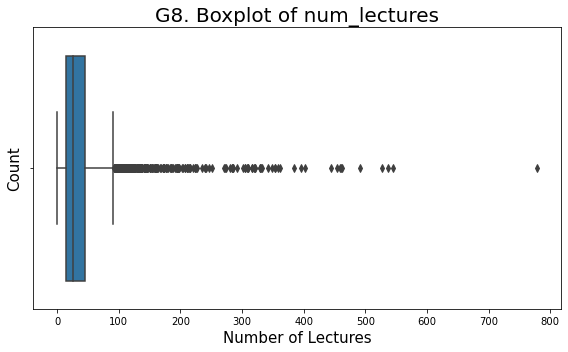

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.num_lectures)
plt.title('G8. Boxplot of num_lectures', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Lectures', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Persebaran Jumlah lecture tidak simetris. Sebagan besar course memiliki lecture di rentang 1-50

In [35]:
df1.num_subscribers[df1.num_lectures>100].median()

1949.0

In [36]:
uf_lecture = (1.5*(df1.num_lectures.quantile(0.75)-df1.num_lectures.quantile(0.25))) + df1.num_lectures.quantile(0.75)
df1.num_lectures[df1.num_lectures>uf_lecture].count()

293

- Berdasarkan grafik G4, terdapat **293 Outlier** dalam data jumlah lectures. Outlier tidak perlu didrop
- Upper Fence jumlah lectures adalah 91.875

##### a4. price

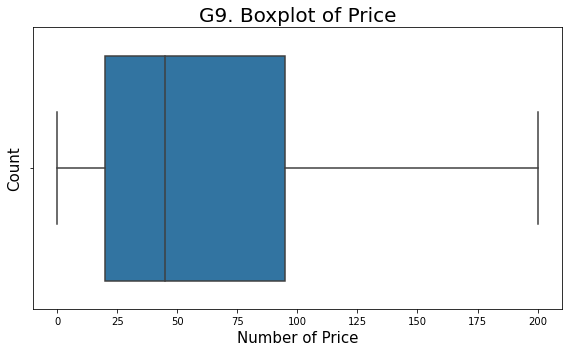

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.price)
plt.title('G9. Boxplot of Price', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Number of Price', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Harga terdistribusi secara skewness negatif. Sebagian besar data harga berada pada rentang harga yg rendah

In [38]:
uf_price = (1.5*(df1.price.quantile(0.75)-df1.price.quantile(0.25))) + df1.price.quantile(0.75)
df1.price[df1.price>uf_price].count()

0

- Berdasarkan grafik G5, **Tidak terdapat Outlier** dalam data price
- Upper Fence price adalah 207.5

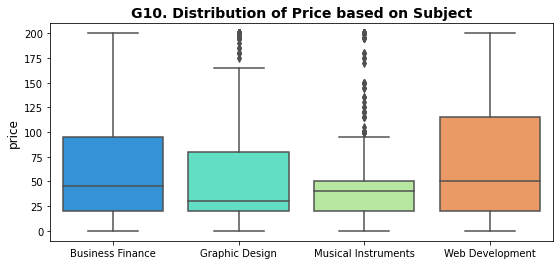

In [39]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='subject', y='price', data=feature_num, palette='rainbow')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G10. Distribution of Price based on Subject', fontsize=14, weight='bold')
plt.show()

- Sebagian besar course yang memiliki harga tinggi ialah course dengan Subject Web Development

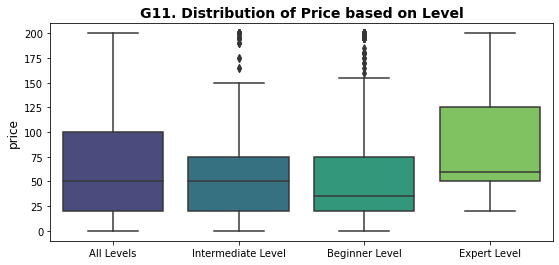

In [40]:
plt.figure(figsize=(9,4))
ax = sns.boxplot(x='level', y='price', data=feature_num, palette='viridis')
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('price', fontsize=12)
ax.set_title('G11. Distribution of Price based on Level', fontsize=14, weight='bold')
plt.show()

- Course dengan level Expert merupakan course yang mendominasi harga tinggi

##### a5. Content Duration

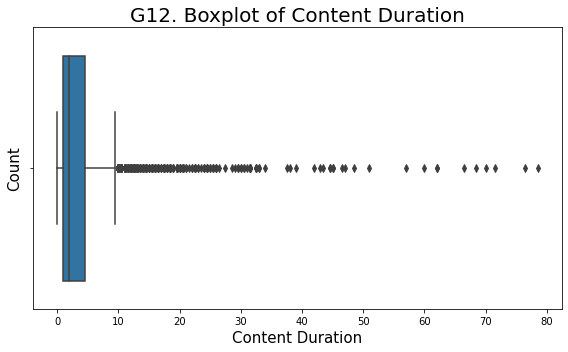

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(df1.content_duration)
plt.title('G12. Boxplot of Content Duration', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Content Duration', fontsize=15)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
plt.show()

- Sebagian besar course memiliki durasi konten singkat

In [42]:
uf_duration = (1.5*(df1.content_duration.quantile(0.75)-df1.content_duration.quantile(0.25))) + df1.content_duration.quantile(0.75)
df1.content_duration[df1.content_duration>uf_duration].count()

313

- Berdasarkan grafik G6, **Terdapat 313 Outlier** dalam data content duration
- Upper Fence content duration adalah 9.75

## b. Analisa 2 variabel

##### b1. Subscribers vs Review

In [43]:
tab_eda2 = df1[['num_reviews','num_subscribers']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_reviews')
tab_eda2.head()

,num_reviews,num_subscribers
1050,1,7
1326,1,2
1323,1,8
1319,1,3
250,1,12


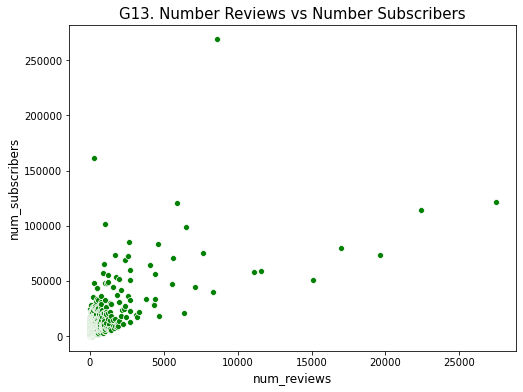

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='num_reviews', y='num_subscribers', data=tab_eda2, color='g')
plt.title('G13. Number Reviews vs Number Subscribers', fontsize=15)
plt.xlabel('num_reviews', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Secara umum memang berdasarkan grafik G7, **semakin banyak reviewers, subscriber semakin besar.** Dan kenaikan jumlah subscribers mulai stabil saat num_reviews >11rb

##### b2. Subscribers vs is_paid

In [45]:
tab_eda3 = pd.crosstab(index=df1.is_paid, columns='Jumlah', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Jumlah', ascending=False)
tab_eda3

col_0,Jumlah
is_paid,
True,8183595
False,3575525


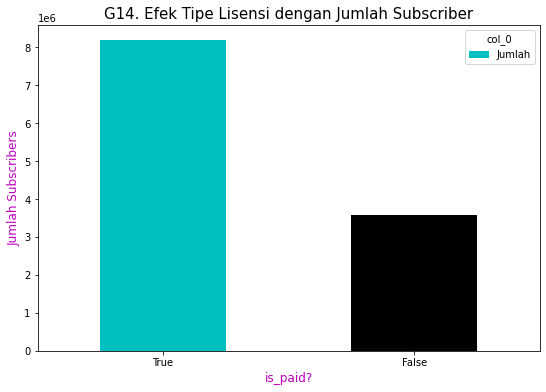

In [46]:
(pd.crosstab(index=df1.is_paid, columns='Jumlah', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Jumlah', ascending=False)).plot(
    figsize=(9,6), 
    kind='bar',
    color = 'ck'
)
plt.title('G14. Efek Tipe Lisensi dengan Jumlah Subscriber', fontsize=15)
plt.ylabel('Jumlah Subscribers', color ='m', fontsize=12)
plt.xlabel('is_paid?', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.show()

- **Tipe konten berbayar lebih banyak mendapatkan jumlah subscriber nya dibandingkan yang tidak berbayar**. Akan tetapi, disini lisensi berbayar ini memiliki price yang beraneka ragam. Oleh karena itu perlu dilihat lebih lanjut lagi apakah harga memiliki pengaruh juga terhadap Jumlah subscribers nya 

##### b3. Subscribers Vs Price

In [47]:
tab_eda4 = pd.crosstab(index=df1.price, columns='Total Subscribers', values=df1.num_subscribers, aggfunc='sum').sort_values(by='Total Subscribers', ascending=True)
tab_eda4.tail()

col_0,Total Subscribers
price,
50,717383
195,939254
20,1320658
200,1336331
0,3575525


- Berdasarkan tab_eda4 di atas, Jumlah price 0 (lisensi gratis) memang memperoleh subscribers terbanyak, sedangkan varian berbayar dengan beraneka ragam price, maksimal hanya mendappatkan jumlah subscribers 1,3 jutaan. 

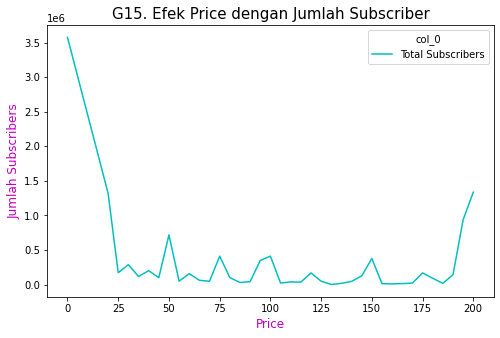

In [48]:
(pd.crosstab(index=df1.price, columns='Total Subscribers', values=df1.num_subscribers, aggfunc='sum')).plot(
    figsize=(8,5), 
    kind='line',
    color = 'c'
)
plt.title('G15. Efek Price dengan Jumlah Subscriber', fontsize=15)
plt.ylabel('Jumlah Subscribers', color ='m', fontsize=12)
plt.xlabel('Price', color='m', fontsize=12)  
plt.tick_params(labelsize=10)
plt.xticks(rotation=360)
plt.show()

- Berdasarkan grafik G9, memang terjadi penurunan saat course menjadi lisensi berbayar, ini merupakan hal yang wajar, karena dalam lisensi berbayar tsb di pecah dalam beberapa variasi harga. Akan tetapi berdasarkan data crosstab sebelumnya jelas menyatakan bahwa jumlah subscriber dari konten berbayar jauh lebih banyak di bandingkan yang gratis **jika hanya dikelompokan menjadi 2 kategori (Gratis dan Berbayar). Jumlah harga memang tidak terlalu berpengaruh terhadap jumlah subscribers, namun ada beberapa titik yang dapat mencapai jumlah maksimal subscribernya. Artinya, ketika membuat konten dengan lisensi berbayar, harus diperhatikan lebih lanjut mengenai range harga yang tepat agar tetep bisa mendapatkan jumlah subscriber maksimal**

- Disini saya coba membuat 3 kategori price, untuk melihat range harga berapa yang dapat mencapai subscribers maksimal

In [49]:
tab_eda5 = df1[['num_subscribers', 'price','subject','level']][df1.price>0]

In [50]:
tab_eda5['price_bin'] = pd.qcut(tab_eda5.price, 3, labels=['Murah', 'Terjangkau' ,'Mahal'])
tab_eda5.head(10)

,num_subscribers,price,subject,level,price_bin
0,2147,200,Business Finance,All Levels,Mahal
1,2792,75,Business Finance,All Levels,Terjangkau
2,2174,45,Business Finance,Intermediate Level,Terjangkau
3,2451,95,Business Finance,All Levels,Mahal
4,1276,200,Business Finance,Intermediate Level,Mahal
5,9221,150,Business Finance,All Levels,Mahal
6,1540,65,Business Finance,Beginner Level,Terjangkau
7,2917,95,Business Finance,All Levels,Mahal
8,5172,195,Business Finance,Expert Level,Mahal
9,827,200,Business Finance,All Levels,Mahal


- Binning digunakan dengan menggunakan qcut agar dapat membagi secara merata jumlah data berdasarkan nilai quantile nya. Sehingga penarikan kesimpulan akan lebih akurat

In [51]:
tab_eda6 = pd.crosstab(index='Jumlah Data', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='count')
tab_eda6

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Data,1150,1131,1087


In [52]:
tab_eda61 = pd.crosstab(index='Jumlah Subscribers', columns=tab_eda5.price_bin, values=tab_eda5.num_subscribers, aggfunc='sum')
tab_eda61

price_bin,Murah,Terjangkau,Mahal
row_0,,,
Jumlah Subscribers,1778233,1855861,4549501


In [53]:
out = pd.qcut(tab_eda5.price,3)
out.unique()

[(75.0, 200.0], (30.0, 75.0], (19.999, 30.0]]
Categories (3, interval[float64]): [(19.999, 30.0] < (30.0, 75.0] < (75.0, 200.0]]

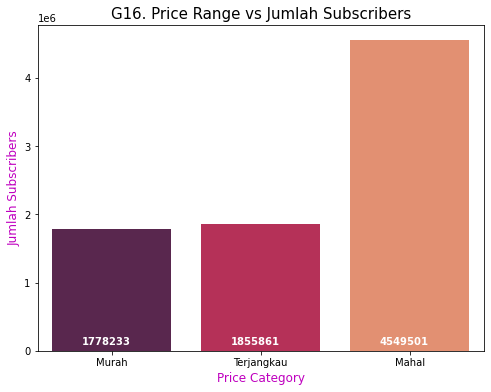

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda61.columns, y=tab_eda61.iloc[0], palette='rocket')
plt.xlabel('Price Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,3):
    plt.text(i-0.2, 100000, tab_eda61.iloc[0][i], fontweight='bold', color='white')
plt.title('G16. Price Range vs Jumlah Subscribers', fontsize=15)
plt.show()

- Berdasarkan hasil binning, ternyata **range Kategori harga Mahal (75-200 USD)** yang mendapatkan jumlah subscribers **maksimal**

In [55]:
tab_eda7 = tab_eda5[tab_eda5.price_bin=='Mahal']
tab_eda71 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.level, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda71

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,3123740,1158367,30434,236960


- Berdasarkan grafik G10 dan tab_eda71, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan menerapkan All Levels pada course nya

In [56]:
tab_eda72 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda7.subject, values=tab_eda7.num_subscribers, aggfunc='sum')
tab_eda72

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
row_0,,,,
Jumlah Subscriber,634781,387982,243389,3283349


- Berdasarkan grafik G10 dan tab_eda72, untuk memaksimalkan jumlah subcribers pada range harga mahal ialah dengan subject Web Development

- Sehingga berdasarkan analisa pada harga ini, Jumlah subscriber dapat diperoleh maksimal pada range harga **Mahal (75-200)**, dengan subject **Web Development**, dan level **All Level**

##### b4. Subscribers vs Content Duration

In [57]:
tab_eda9 = df1[['num_subscribers', 'num_reviews','num_lectures', 'content_duration', 'level', 'subject', 'price']][(df1.content_duration>0)].sort_values(by='content_duration')

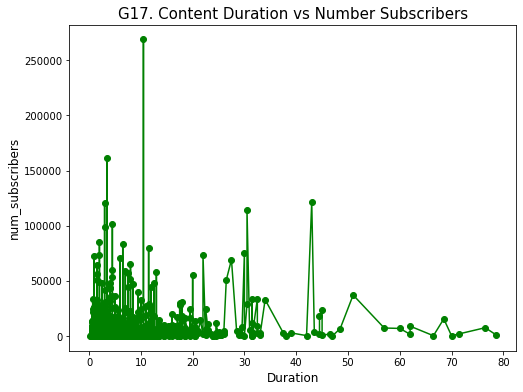

In [58]:
plt.figure(figsize=(8,6))
plt.plot(tab_eda9.content_duration,tab_eda9.num_subscribers, 'go-')
plt.title('G17. Content Duration vs Number Subscribers', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)
plt.show()

- Berdasarkan grafik G11, content_duration **tidak berpengaruh** terhadap jumlah subscribers

- Namun disini saya akan coba kelompokkan content duration dan melihat pada range berapa durasi konten dapat memperoleh jumlah subscribers yang maksimal

In [59]:
tab_eda9.content_duration.unique()

array([ 0.13,  0.32,  0.45,  0.47,  0.48,  0.5 ,  0.52,  0.53,  0.55,
        0.57,  0.58,  0.6 ,  0.62,  0.63,  0.65,  0.67,  0.68,  0.7 ,
        0.72,  0.73,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,
        4.5 ,  5.  ,  5.5 ,  6.  ,  6.5 ,  7.  ,  7.5 ,  8.  ,  8.5 ,
        9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 , 12.  , 12.5 , 13.  ,
       13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  , 16.5 , 17.  , 17.5 ,
       18.  , 18.5 , 19.  , 19.5 , 20.  , 20.5 , 21.  , 21.5 , 22.  ,
       22.5 , 23.  , 23.5 , 24.  , 24.5 , 25.  , 25.5 , 26.  , 26.5 ,
       27.5 , 28.5 , 29.  , 29.5 , 30.  , 30.5 , 31.  , 31.5 , 32.5 ,
       33.  , 34.  , 37.5 , 38.  , 39.  , 42.  , 43.  , 43.5 , 44.5 ,
       45.  , 46.5 , 47.  , 48.5 , 51.  , 57.  , 60.  , 62.  , 66.5 ,
       68.5 , 70.  , 71.5 , 76.5 , 78.5 ])

In [60]:
tab_eda9['duration_bin'] = pd.cut(tab_eda9['content_duration'], bins=[0, tab_eda9.content_duration.quantile(0.25), tab_eda9.content_duration.quantile(0.5), tab_eda9.content_duration.quantile(0.75), df['content_duration'].max()], labels=['Singkat', 'Cukup', 'Lama', 'Sangat Lama'])
tab_eda9.head(2)

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat


In [61]:
tab_eda91 = pd.crosstab(index='Jumlah Data', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='count')
tab_eda91

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Data,933,926,957,861


In [62]:
tab_eda92 = pd.crosstab(index='Jumlah Subscriber', columns=tab_eda9.duration_bin, values=tab_eda9.num_subscribers, aggfunc='sum')
tab_eda92

duration_bin,Singkat,Cukup,Lama,Sangat Lama
row_0,,,,
Jumlah Subscriber,1797668,2558127,3028817,4374508


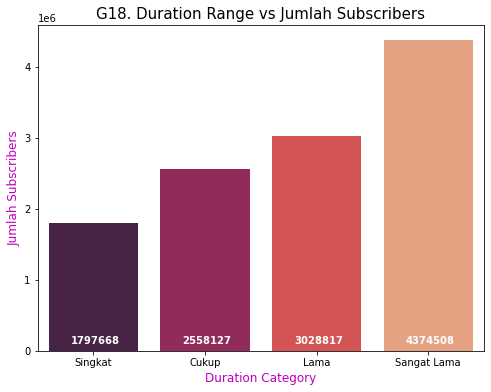

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda92.columns, y=tab_eda92.iloc[0], palette='rocket')
plt.xlabel('Duration Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda92.iloc[0][i], fontweight='bold', color='white')
plt.title('G18. Duration Range vs Jumlah Subscribers', fontsize=15)

plt.show()

- **Semakin lama content duration, jumlah subscribers semakin banyak**. Dan memperoleh jumlah subscribers maksimal pada durasi dg kategori sangat lama (4.5 - 78.5)

##### b5. Subscribers vs lecture

In [64]:
tab_eda10 = df1[['num_subscribers', 'num_lectures', 'subject']][(df1.content_duration>0)].sort_values(by='num_lectures')

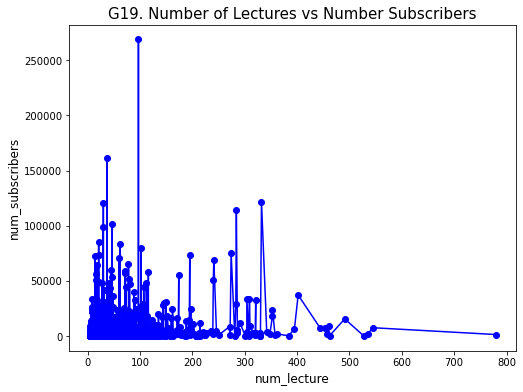

In [65]:
plt.figure(figsize=(8,6))
plt.plot(tab_eda10.num_lectures,tab_eda9.num_subscribers,'bo-')
plt.title('G19. Number of Lectures vs Number Subscribers', fontsize=15)
plt.xlabel('num_lecture', fontsize=12)
plt.ylabel('num_subscribers', fontsize=12)

plt.show()

- Berdasarkan grafik G13, num_lecture **tidak begitu berpengaruh** terhadap jumlah subscribers

##### b6. Subscribers vs Subject

In [66]:
tab_eda11 = df1[['num_subscribers', 'subject']][(df1.content_duration>0)]
tab_eda11a = pd.crosstab(index=tab_eda11.subject, columns='Jumlah Subscriber', values=tab_eda11.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)
tab_eda11a

col_0,Jumlah Subscriber
subject,
Web Development,7980572
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


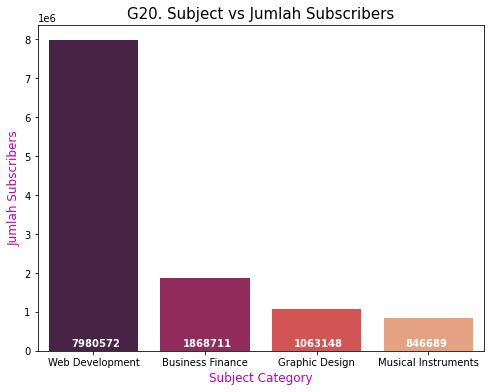

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda11a.index, y=tab_eda11a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Subject Category', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda11a['Jumlah Subscriber'].iloc[i], fontweight='bold', color='white')
plt.title('G20. Subject vs Jumlah Subscribers', fontsize=15)
plt.show()

- Subject **Web Development** ialah subject yang paling banyak diminati para subscriber untuk dibeli

##### b7. Subscribers vs Level

In [68]:
tab_eda12 = df1[['num_subscribers', 'level']][(df1.content_duration>0)]
tab_eda12a = pd.crosstab(index=tab_eda12.level, columns='Jumlah Subscriber', values=tab_eda12.num_subscribers, aggfunc='sum').sort_values(by='Jumlah Subscriber', ascending=False)

In [69]:
pd.crosstab(index='Jumlah Subscriber', columns=tab_eda12.level, values=tab_eda12.num_subscribers, aggfunc='count')

level,All Levels,Beginner Level,Expert Level,Intermediate Level
row_0,,,,
Jumlah Subscriber,1928,1270,58,421


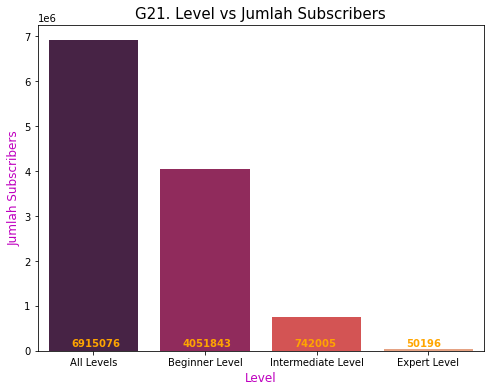

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(x=tab_eda12a.index, y=tab_eda12a['Jumlah Subscriber'].iloc[:], palette='rocket')
plt.xlabel('Level', c='m', fontsize=12)
plt.ylabel('Jumlah Subscribers', c='m', fontsize=12)
for i in range(0,4):
    plt.text(i-0.2, 100000, tab_eda12a['Jumlah Subscriber'][i], fontweight='bold', color='orange')
plt.title('G21. Level vs Jumlah Subscribers', fontsize=15)

plt.show()

- Level course yang dapat mencapai subscriber maksimal secara keseluruhan ialah pada All Level

##### b8. Reviews vs Content_duration

In [71]:
tab_eda13 = tab_eda9.copy()
tab_eda13.head()

,num_subscribers,num_reviews,num_lectures,content_duration,level,subject,price,duration_bin
116,307,8,5,0.13,All Levels,Business Finance,25,Singkat
448,605,19,4,0.32,All Levels,Business Finance,20,Singkat
984,327,1,12,0.45,Beginner Level,Business Finance,20,Singkat
718,23,7,6,0.47,All Levels,Business Finance,20,Singkat
1937,1582,11,6,0.48,All Levels,Musical Instruments,20,Singkat


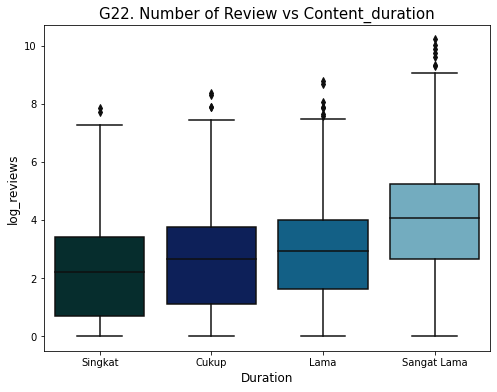

In [72]:
plt.figure(figsize=(8,6))
tab_eda13['log_reviews'] = np.log(tab_eda13.num_reviews)
sns.boxplot(x='duration_bin', y='log_reviews', data=tab_eda13, palette='ocean')
plt.title('G22. Number of Review vs Content_duration', fontsize=15)
plt.xlabel('Duration', fontsize=12)
plt.ylabel('log_reviews', fontsize=12)

plt.show()

- Semakin lama content_duration, semakin banyak reviewers

In [73]:
tab_eda131 = pd.crosstab(index=tab_eda13.duration_bin, columns='Jumlah Review', values=tab_eda13.num_reviews, aggfunc='sum').sort_values(by='Jumlah Review', ascending=True)

In [74]:
tab_eda131

col_0,Jumlah Review
duration_bin,
Singkat,50621
Cukup,63225
Lama,90332
Sangat Lama,370543


- Semakin lama durasi konten, maka jumlah reviews akan semakin banyak. Dan dapat mencapai num_reviews terbanyak pada durasi 'Sangat Lama'.

##### b9. Reviews vs num_lectures

<Figure size 576x432 with 0 Axes>

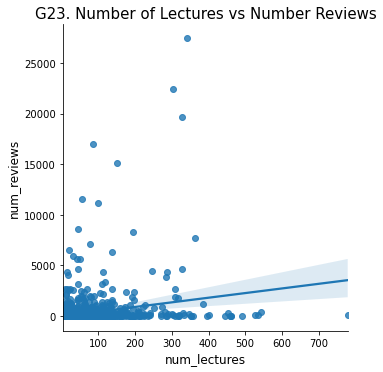

In [75]:
tab_eda14 = df1[['num_lectures','num_reviews']][(df1.num_subscribers>0) & (df1.num_reviews>0)].sort_values(by='num_lectures')
plt.figure(figsize=(8,6))
sns.lmplot(x='num_lectures',y='num_reviews', data=tab_eda14, palette='rainbow')
plt.title('G23. Number of Lectures vs Number Reviews', fontsize=15)
plt.xlabel('num_lectures', fontsize=12)
plt.ylabel('num_reviews', fontsize=12)

plt.show()

- Pengaruh jumlah lecture terhadap jumlah review tidak begitu kuat

##### b10. Content_duration vs num_lectures

In [76]:
tab_eda15 = tab_eda9[['num_lectures', 'content_duration', 'duration_bin','price']].sort_values(by='content_duration')

<Figure size 576x432 with 0 Axes>

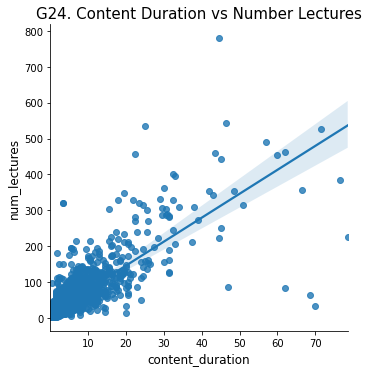

In [77]:
plt.figure(figsize=(8,6))
sns.lmplot(x='content_duration', y='num_lectures', data=tab_eda15, palette='ocean')
plt.title('G24. Content Duration vs Number Lectures', fontsize=15)
plt.xlabel('content_duration', fontsize=12)
plt.ylabel('num_lectures', fontsize=12)

plt.show()

- Jumlah lecture dan durasi konten memiliki korelasi positif yang kuat

In [78]:
df1[df1.num_lectures==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investors-in-retirement-accounts/,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance


![Ini image](https://i.ibb.co/PwRKT8s/IMG-course-0-duration.png)

In [79]:
publish_dt = df1['published_timestamp'].dt

In [80]:
df1['year_p'] = publish_dt.year
df1['month_p'] = publish_dt.month
df1['date_p'] = publish_dt.day

In [81]:
df1.drop(columns=['published_timestamp'], inplace=True)

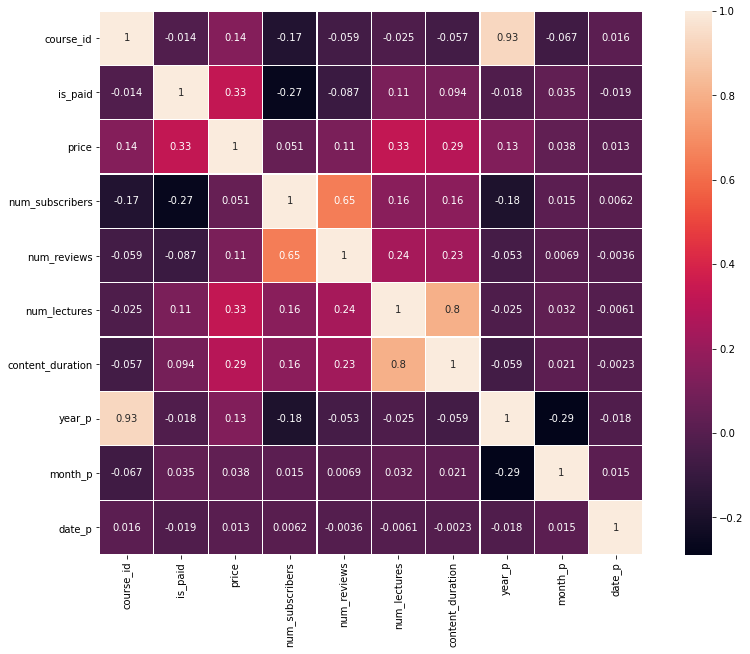

In [82]:
plt.figure(figsize=(15, 10))

sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
plt.show()

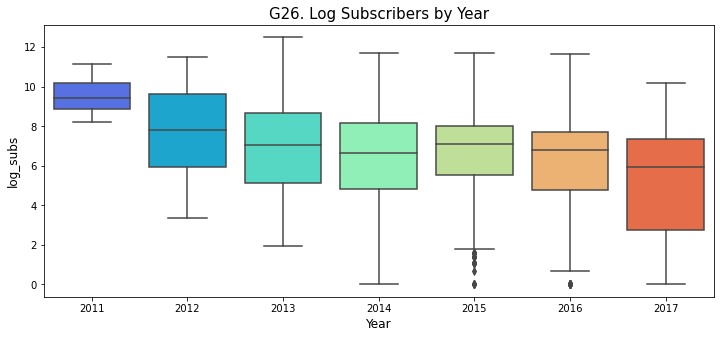

In [83]:
plt.figure(figsize=(12,5))
mama = df1.copy()
mama['log_subs'] = np.log(mama.num_subscribers)
sns.boxplot(x='year_p', y='log_subs', data=mama, palette='rainbow')
plt.title('G26. Log Subscribers by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('log_subs', fontsize=12)
plt.show()

- Semakin bertambahnya tahun perilisan, semakin menurun jumlah subscriber

##### Kesimpulan Analisis

- Jumlah review sangat kuat dalam mempengaruhi perolehan jumlah subscribers.
- Tipe lisensi gratis sangat mudah untuk memperoleh banyak subscriber, sedangkan tipe lisensi berbayar dapat dimaksimalkan untuk memperoleh subscribers dengan membuat pengelompokkan harga. Berdasarkan data, range harga yang dapat memaksimalkan jumlah subscriber ialah pada range harga 75-200 USD
- Content duration dan Jumlah lecture memiliki pengaruh yang kecil terhadap jumlah subscribers namun lebih besar pengaruhnya terhadap jumlah review
- Subject yang paling banyak diminati secara keseluruhan ialah Web Development dan Business Finance, sedangkan pada range harga 75-200 ialah Web Development
- Level course yang cukup banyak mendapatkan jumlah subscribers yang tinggi ialah All Levels

# (7) Feature Engineering & Feature Selection

In [84]:
def success(x):
    if x <= 1500:
        return 0
    elif x > 1500:
        return 1

In [85]:
df_b = df1[(df1.content_duration>0) & (df1.num_lectures>0)]
df_b.drop([1473,1100,2561,787,894,788], axis=0, inplace=True)
df_b.set_index('course_id',inplace=True)
df_b.drop(columns=['url', 'course_title'], inplace=True)
df_b['is_success'] = df_b['num_subscribers'].apply(success)
df_b.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,year_p,month_p,date_p,is_success
course_id,,,,,,,,,,,,
1070968,True,200,2147,23,51,All Levels,1.5,Business Finance,2017,1,18,1
1113822,True,75,2792,923,274,All Levels,39.0,Business Finance,2017,3,9,1
1006314,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016,12,19,1
1210588,True,95,2451,11,36,All Levels,3.0,Business Finance,2017,5,30,1
1011058,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016,12,13,0


In [86]:
dfix = df1[(df1.content_duration>0) & (df1.num_lectures>0)]
dfix.drop([1473,1100,2561,787,894,788], axis=0, inplace=True)
dfix.set_index('course_id',inplace=True)
dfix.drop(columns=['url', 'course_title','num_lectures','content_duration','month_p','date_p'], inplace=True)
dfix['is_success'] = dfix['num_subscribers'].apply(success)
dfix.tail()

,is_paid,price,num_subscribers,num_reviews,level,subject,year_p,is_success
course_id,,,,,,,,
775618,True,100,1040,14,All Levels,Web Development,2016,0
1088178,True,25,306,3,Beginner Level,Web Development,2017,0
635248,True,40,513,169,All Levels,Web Development,2015,0
905096,True,50,300,31,All Levels,Web Development,2016,0
297602,True,45,901,36,Beginner Level,Web Development,2014,0


In [87]:
df_b['level_enc'] = df_b.level.map({
    "All Levels":0,
    "Beginner Level":1,
    "Intermediate Level":2,
    "Expert Level":3,
})
df_b = pd.get_dummies(df_b, columns=['is_paid','subject'], prefix_sep='_')
df_b.head()

,price,num_subscribers,num_reviews,num_lectures,level,content_duration,year_p,month_p,date_p,is_success,level_enc,is_paid_False,is_paid_True,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
course_id,,,,,,,,,,,,,,,,,
1070968,200,2147,23,51,All Levels,1.5,2017,1,18,1,0,0,1,1,0,0,0
1113822,75,2792,923,274,All Levels,39.0,2017,3,9,1,0,0,1,1,0,0,0
1006314,45,2174,74,51,Intermediate Level,2.5,2016,12,19,1,2,0,1,1,0,0,0
1210588,95,2451,11,36,All Levels,3.0,2017,5,30,1,0,0,1,1,0,0,0
1011058,200,1276,45,26,Intermediate Level,2.0,2016,12,13,0,2,0,1,1,0,0,0


In [88]:
dfix['level_enc'] = dfix.level.map({
    "All Levels":0,
    "Beginner Level":1,
    "Intermediate Level":2,
    "Expert Level":3,
})
dfix = pd.get_dummies(dfix, columns=['is_paid','subject'], prefix_sep='_')
dfix.head()

,price,num_subscribers,num_reviews,level,year_p,is_success,level_enc,is_paid_False,is_paid_True,subject_Business Finance,subject_Graphic Design,subject_Musical Instruments,subject_Web Development
course_id,,,,,,,,,,,,,
1070968,200,2147,23,All Levels,2017,1,0,0,1,1,0,0,0
1113822,75,2792,923,All Levels,2017,1,0,0,1,1,0,0,0
1006314,45,2174,74,Intermediate Level,2016,1,2,0,1,1,0,0,0
1210588,95,2451,11,All Levels,2017,1,0,0,1,1,0,0,0
1011058,200,1276,45,Intermediate Level,2016,0,2,0,1,1,0,0,0


In [89]:
df_b.drop(columns=['level','num_subscribers','num_reviews'], inplace=True)
df_b.rename(columns={
    "subject_Business Finance":"business_subject",
    "subject_Graphic Design":"graphic_subject",
    "subject_Musical Instruments":"music_subject",
    "subject_Web Development":"webdev_subject"
}, inplace=True)
df_b.head()

,price,num_lectures,content_duration,year_p,month_p,date_p,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,,,,,,
1070968,200,51,1.5,2017,1,18,1,0,0,1,1,0,0,0
1113822,75,274,39.0,2017,3,9,1,0,0,1,1,0,0,0
1006314,45,51,2.5,2016,12,19,1,2,0,1,1,0,0,0
1210588,95,36,3.0,2017,5,30,1,0,0,1,1,0,0,0
1011058,200,26,2.0,2016,12,13,0,2,0,1,1,0,0,0


In [90]:
dfix.drop(columns=['level','price','num_subscribers','num_reviews'], inplace=True)
dfix.rename(columns={
    "subject_Business Finance":"business_subject",
    "subject_Graphic Design":"graphic_subject",
    "subject_Musical Instruments":"music_subject",
    "subject_Web Development":"webdev_subject"
}, inplace=True)
dfix.head()

,year_p,is_success,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,,
1070968,2017,1,0,0,1,1,0,0,0
1113822,2017,1,0,0,1,1,0,0,0
1006314,2016,1,2,0,1,1,0,0,0
1210588,2017,1,0,0,1,1,0,0,0
1011058,2016,0,2,0,1,1,0,0,0


In [91]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1070968 to 297602
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3671 non-null   int64  
 1   num_lectures      3671 non-null   int64  
 2   content_duration  3671 non-null   float64
 3   year_p            3671 non-null   int64  
 4   month_p           3671 non-null   int64  
 5   date_p            3671 non-null   int64  
 6   is_success        3671 non-null   int64  
 7   level_enc         3671 non-null   int64  
 8   is_paid_False     3671 non-null   uint8  
 9   is_paid_True      3671 non-null   uint8  
 10  business_subject  3671 non-null   uint8  
 11  graphic_subject   3671 non-null   uint8  
 12  music_subject     3671 non-null   uint8  
 13  webdev_subject    3671 non-null   uint8  
dtypes: float64(1), int64(7), uint8(6)
memory usage: 279.6 KB


In [92]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1070968 to 297602
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year_p            3671 non-null   int64
 1   is_success        3671 non-null   int64
 2   level_enc         3671 non-null   int64
 3   is_paid_False     3671 non-null   uint8
 4   is_paid_True      3671 non-null   uint8
 5   business_subject  3671 non-null   uint8
 6   graphic_subject   3671 non-null   uint8
 7   music_subject     3671 non-null   uint8
 8   webdev_subject    3671 non-null   uint8
dtypes: int64(3), uint8(6)
memory usage: 136.2 KB


# (8) Exporting Clean File

In [93]:
dfix.to_csv('final_f.csv')
df_b.to_csv('final_b.csv')

# (9) Handling Imbalance Data

In [94]:
dfix.is_success.value_counts(normalize=True)

0    0.628167
1    0.371833
Name: is_success, dtype: float64

- Data sudah balance jadi tidak perlu ada handling imbalance

# Splitting Data

- **Semua yang berakhiran "b", berarti df_base**
- **Semua yang berakhiran "f", merupakan dfix hasil feature engineering**

In [95]:
Xb = df_b.drop(columns ='is_success')
yb = df_b.is_success

Xf = dfix.drop(columns ='is_success')
yf = dfix.is_success

In [96]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, stratify=yb, test_size = .25, random_state=0)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, stratify=yf, test_size = .25, random_state=0)

In [97]:
Xb_train.shape

(2753, 13)

In [98]:
Xf_train.shape

(2753, 8)

In [99]:
Xf_train.head()

,year_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
course_id,,,,,,,,
629088,2015,1,0,1,0,0,0,1
544556,2015,0,0,1,1,0,0,0
219838,2014,2,0,1,0,0,0,1
883394,2016,0,0,1,1,0,0,0
735550,2016,0,0,1,1,0,0,0


In [100]:
Xf_train.iloc[0]

year_p              2015
level_enc           1   
is_paid_False       0   
is_paid_True        1   
business_subject    0   
graphic_subject     0   
music_subject       0   
webdev_subject      1   
Name: 629088, dtype: int64

# Modeling

##### Dalam pembuatan model ini, akan dilimitasi bahwa model hanya digunakan sebagai alat untuk memprediksi/mendeteksi sukses tidak nya suatu course yang akan dibuka. 
##### Hasil prediksi akan berupa persentase kesuksesan / keberhasilan dari course yang akan di-*release* dengan feature-feature yang tersedia

- Dalam penggunaan algoritma untuk membuat model **akan banyak classification report, confusion matrix, serta accuracy score dan roc_auc_score yang dihasilkan**. Oleh karena itu akan dijelaskan terlebih dahulu disini, sehingga ini dapat diterapkan ke setiap pembacaan classification report, confusion matrix, serta accuracy and roc_auc_score

![ini image](https://i.ibb.co/jWc7mtX/Confusion-matrix.png)

### Penjelasan Classification Report
1. recall 0 (recall negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah aktual negatif (TN + FP)
2. recall 1 (recall positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah aktual positif (TP + FN)
3. precision 0 (precision negatif) => merupakan jumlah prediksi benar di kelas negatif (TN) dibandingkan seluruh jumlah tebakan negatif (TN + FN)
4. precision 1 (precision positif) => merupakan jumlah prediksi benar di kelas positif (TP) dibandingkan seluruh jumlah tebakan positif (TP + FP)
5. Accuracy => seluruh tebakan benar dibandingkan seluruh seluruh data

- Dikarenakan dataset yang digunakan memiliki target yang balance, maka accuracy dapat juga di pertimbangkan sebagai penentu ketepatan model
- Fokus model ialah untuk memperoleh recall negatif dan akurasi setinggi mungkin, sehingga False Positif dapat dihindari.
- Alasan mengapa False Positif perlu dihindari dikarenakan:
  - Course yang actualnya **SUKSES (1)** ditebak **TIDAK SUKSES(0)** (FN), perusahaan hanya rugi karena kehilangan kesempatan meraup keuntungan.
  - Sedangkan ketika course yang actualnya **TIDAK SUKSES (0)** ditebak **SUKSES(1)**, maka perusahaan akan rugi karena kehilangan cost yang telah banyak dikeluarkan, apalagi jika lecture yang dikontrak banyak, maka mendapat kerugian juga karena sudang menggaji nya. Oleh karena itu kerugian ini lah yang harus dihindari
- Artinya tujuan **pembuatan model akan dicari yang recall 0 dan accuracy nya tinggi**

### Penjelasan Confusion Matrix
1. TP ==> ialah ketika aktual positif ditebak positif
2. FP ==> ialah ketika aktual negatif ditebak positif
3. TN ==> ialah ketika aktual negatif ditebak negatif
4. FN ==> ialah ketika aktual positif ditebak negatif


# (10-11, 14-15) Training with Base and Complex Model

### Model 1 - Logistic Regeression

### 1. Base

In [101]:
model_b1 = LogisticRegression()
model_b1.fit(Xb_train,yb_train)

LogisticRegression()

In [102]:
yb1_pred = model_b1.predict(Xb_test)
yb1_predt = model_b1.predict(Xb_train)

In [103]:
print(classification_report(yb_test, yb1_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       577
           1       0.65      0.62      0.63       341

    accuracy                           0.73       918
   macro avg       0.71      0.71      0.71       918
weighted avg       0.73      0.73      0.73       918



In [104]:
print(classification_report(yb_train, yb1_predt))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1729
           1       0.67      0.59      0.63      1024

    accuracy                           0.74      2753
   macro avg       0.72      0.71      0.72      2753
weighted avg       0.74      0.74      0.74      2753



In [105]:
cbb1 = confusion_matrix(yb_test, yb1_pred, labels=[1, 0])
cb_b1 = pd.DataFrame(cbb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b1

,Pred 1,Pred 0
Act 1,210,131
Act 0,113,464


In [106]:
roc_b1 = roc_auc_score(yb_test, yb1_pred)
recall0_b1 = recall_score(yb_test, yb1_pred, pos_label=0)
FNb1= cb_b1['Pred 0'].iloc[0]
FPb1 = cb_b1['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [107]:
model_f1 = LogisticRegression()
model_f1.fit(Xf_train,yf_train)

LogisticRegression()

In [108]:
yf1_pred = model_f1.predict(Xf_test)
yf1_predt = model_f1.predict(Xf_train)

In [109]:
print(classification_report(yf_test, yf1_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [110]:
print(classification_report(yf_train, yf1_predt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1729
           1       0.68      0.67      0.67      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.74      0.74      2753
weighted avg       0.76      0.76      0.76      2753



In [111]:
cfb1 = confusion_matrix(yf_test, yf1_pred, labels=[1, 0])
cf_b1 = pd.DataFrame(cfb1,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b1

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [112]:
roc_f1 = roc_auc_score(yf_test, yf1_pred)
recall0_f1 = recall_score(yf_test, yf1_pred, pos_label=0)
FNf1= cf_b1['Pred 0'].iloc[0]
FPf1= cf_b1['Pred 1'].iloc[1]

### Model 2 - XGB Classifier

### 1. Base

In [113]:
model_b2 = XGBClassifier()
model_b2.fit(Xb_train,yb_train)

XGBClassifier()

In [114]:
yb2_pred = model_b2.predict(Xb_test)
yb2_predt = model_b2.predict(Xb_train)

In [115]:
print(classification_report(yb_test, yb2_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       577
           1       0.71      0.66      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [116]:
print(classification_report(yb_train, yb2_predt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1729
           1       0.78      0.71      0.74      1024

    accuracy                           0.82      2753
   macro avg       0.81      0.79      0.80      2753
weighted avg       0.81      0.82      0.81      2753



In [280]:
roc_auc_score(yb_test, yb2_pred)

0.7501893198208958

In [279]:
roc_auc_score(yb_train, yb2_predt)

0.7937634425607286

In [117]:
cbb2 = confusion_matrix(yb_test, yb2_pred, labels=[1, 0])
cb_b2 = pd.DataFrame(cbb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b2

,Pred 1,Pred 0
Act 1,225,116
Act 0,92,485


In [118]:
roc_b2 = roc_auc_score(yb_test, yb2_pred)
recall0_b2 = recall_score(yb_test, yb2_pred, pos_label=0)
FNb2= cb_b2['Pred 0'].iloc[0]
FPb2 = cb_b2['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [119]:
model_f2 = XGBClassifier()
model_f2.fit(Xf_train,yf_train)

XGBClassifier()

In [120]:
yf2_pred = model_f2.predict(Xf_test)
yf2_predt = model_f2.predict(Xf_train)

In [121]:
print(classification_report(yf_test, yf2_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       577
           1       0.71      0.65      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [122]:
print(classification_report(yf_train, yf2_predt))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1729
           1       0.72      0.61      0.66      1024

    accuracy                           0.77      2753
   macro avg       0.75      0.73      0.74      2753
weighted avg       0.76      0.77      0.76      2753



In [123]:
cfb2 = confusion_matrix(yf_test, yf2_pred, labels=[1, 0])
cf_b2 = pd.DataFrame(cfb2,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b2

,Pred 1,Pred 0
Act 1,222,119
Act 0,91,486


In [124]:
roc_f2 = roc_auc_score(yf_test, yf2_pred)
recall0_f2 = recall_score(yf_test, yf2_pred, pos_label=0)
FNf2= cf_b2['Pred 0'].iloc[0]
FPf2 = cf_b2['Pred 1'].iloc[1]

### Model 3 - KNN Classifier

### 1. Base

In [125]:
model_b3 = KNeighborsClassifier()
model_b3.fit(Xb_train,yb_train)

KNeighborsClassifier()

In [126]:
yb3_pred = model_b3.predict(Xb_test)
yb3_predt = model_b3.predict(Xb_train)

In [127]:
print(classification_report(yb_test, yb3_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       577
           1       0.54      0.47      0.50       341

    accuracy                           0.65       918
   macro avg       0.62      0.62      0.62       918
weighted avg       0.65      0.65      0.65       918



In [128]:
print(classification_report(yb_train, yb3_predt))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1729
           1       0.73      0.61      0.66      1024

    accuracy                           0.77      2753
   macro avg       0.76      0.74      0.74      2753
weighted avg       0.77      0.77      0.77      2753



In [129]:
cbb3 = confusion_matrix(yb_test, yb3_pred, labels=[1, 0])
cb_b3 = pd.DataFrame(cbb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_b3

,Pred 1,Pred 0
Act 1,159,182
Act 0,135,442


In [130]:
roc_b3 = roc_auc_score(yb_test, yb3_pred)
recall0_b3 = recall_score(yb_test, yb3_pred, pos_label=0)
FNb3= cb_b3['Pred 0'].iloc[0]
FPb3 = cb_b3['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [131]:
model_f3 = KNeighborsClassifier()
model_f3.fit(Xf_train,yf_train)

KNeighborsClassifier()

In [132]:
yf3_pred = model_f3.predict(Xf_test)
yf3_predt = model_f3.predict(Xf_train)

In [133]:
print(classification_report(yf_test, yf3_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       577
           1       0.66      0.66      0.66       341

    accuracy                           0.75       918
   macro avg       0.73      0.73      0.73       918
weighted avg       0.75      0.75      0.75       918



In [134]:
print(classification_report(yf_train, yf3_predt))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1729
           1       0.68      0.65      0.66      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.73      0.74      2753
weighted avg       0.75      0.76      0.75      2753



In [135]:
cfb3 = confusion_matrix(yf_test, yf3_pred, labels=[1, 0])
cf_b3 = pd.DataFrame(cfb3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_b3

,Pred 1,Pred 0
Act 1,226,115
Act 0,118,459


In [136]:
roc_f3 = roc_auc_score(yf_test, yf3_pred)
recall0_f3 = recall_score(yf_test, yf3_pred, pos_label=0)
FNf3= cf_b3['Pred 0'].iloc[0]
FPf3 = cf_b3['Pred 1'].iloc[1]

# Preprocessing

### A. Scalling

- Dikarenakan dataset terdapat banyak outlier dan target tidak terdistribusi normal, maka digunakan lah "Robust Scaller"

In [137]:
scaler = RobustScaler()

In [138]:
Xb_scaled = scaler.fit_transform(Xb_train)
Xf_scaled = scaler.fit_transform(Xf_train)
Xb_tests = scaler.fit_transform(Xb_test)
Xf_tests = scaler.fit_transform(Xf_test)

### LogisticScaled

### 1. Base Scaled

In [139]:
model_b1.fit(Xb_scaled, yb_train)

LogisticRegression()

In [140]:
ybs_pred = model_b1.predict(Xb_tests)
ybs_predt = model_b1.predict(Xb_scaled)

In [141]:
print(classification_report(yb_test, ybs_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [142]:
print(classification_report(yb_train, ybs_predt))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1729
           1       0.73      0.62      0.67      1024

    accuracy                           0.77      2753
   macro avg       0.76      0.74      0.75      2753
weighted avg       0.77      0.77      0.77      2753



In [143]:
cbls = confusion_matrix(yb_test, ybs_pred, labels=[1, 0])
cb_ls = pd.DataFrame(cbls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_ls

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [144]:
roc_bls = roc_auc_score(yb_test, ybs_pred)
recall0_bls = recall_score(yb_test, ybs_pred, pos_label=0)
FNbls= cb_ls['Pred 0'].iloc[0]
FPbls = cb_ls['Pred 1'].iloc[1]

### 2. Complex (dfix Scaled)

In [145]:
model_f1.fit(Xf_scaled, yf_train)

LogisticRegression()

In [146]:
yfs_pred = model_f1.predict(Xf_tests)
yfs_predt = model_f1.predict(Xf_scaled)

In [147]:
print(classification_report(yf_test, yfs_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [148]:
print(classification_report(yf_train, yfs_predt))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1729
           1       0.70      0.63      0.66      1024

    accuracy                           0.76      2753
   macro avg       0.74      0.73      0.74      2753
weighted avg       0.76      0.76      0.76      2753



In [149]:
cfls = confusion_matrix(yf_test, yfs_pred, labels=[1, 0])
cf_ls = pd.DataFrame(cfls,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_ls

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [150]:
roc_fls = roc_auc_score(yf_test, yfs_pred)
recall0_fls = recall_score(yf_test, yfs_pred, pos_label=0)
FNfls= cf_ls['Pred 0'].iloc[0]
FPfls = cf_ls['Pred 1'].iloc[1]

### B. Manual Tunning KNN Scaled

### 1. Base

In [151]:
train_score3 = []
test_score3 = []

for k in range (1, 100, 2):
    knn3 = KNeighborsClassifier(n_neighbors= k)
    knn3.fit(Xb_scaled, yb_train)
#     recall_score(y_test, y_predict)
    train_score3.append(knn3.score(Xb_scaled, yb_train))
    test_score3.append(knn3.score(Xb_tests, yb_test))

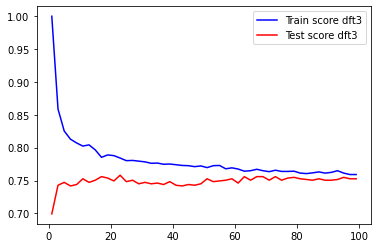

In [152]:
plt.plot(range(1, 100, 2), train_score3, 'b', label='Train score dft3')
plt.plot(range(1, 100, 2), test_score3, 'r', label='Test score dft3')
plt.legend()
plt.show()

In [153]:
print(test_score3)

[0.6993464052287581, 0.7429193899782135, 0.7472766884531591, 0.7418300653594772, 0.7440087145969498, 0.7527233115468409, 0.7472766884531591, 0.7505446623093682, 0.7559912854030502, 0.7538126361655774, 0.7494553376906318, 0.7581699346405228, 0.7483660130718954, 0.7505446623093682, 0.7450980392156863, 0.7472766884531591, 0.7450980392156863, 0.7461873638344226, 0.7440087145969498, 0.7483660130718954, 0.7429193899782135, 0.7418300653594772, 0.7440087145969498, 0.7429193899782135, 0.7450980392156863, 0.7527233115468409, 0.7483660130718954, 0.7494553376906318, 0.7505446623093682, 0.7527233115468409, 0.7461873638344226, 0.7559912854030502, 0.7505446623093682, 0.7559912854030502, 0.7559912854030502, 0.7505446623093682, 0.7559912854030502, 0.7505446623093682, 0.7538126361655774, 0.7549019607843137, 0.7527233115468409, 0.7516339869281046, 0.7505446623093682, 0.7527233115468409, 0.7505446623093682, 0.7505446623093682, 0.7516339869281046, 0.7549019607843137, 0.7527233115468409, 0.7527233115468409]

In [154]:
np.max(test_score3)

0.7581699346405228

In [155]:
k = []
for i in range(1, 100, 2):
    k.append(i)
print(k)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [156]:
n = k[np.argmax(test_score3)]

In [157]:
modelknn_s3 = KNeighborsClassifier(n_neighbors=n)
modelknn_s3.fit(Xb_scaled, yb_train)

KNeighborsClassifier(n_neighbors=23)

In [158]:
y_predk_s3 = modelknn_s3.predict(Xb_tests)

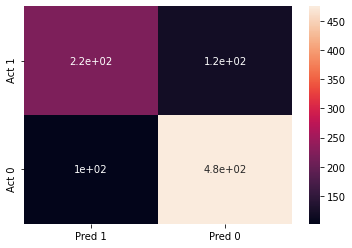

In [159]:
cks3 = confusion_matrix(yb_test, y_predk_s3, labels=[1, 0])
cknns3 = pd.DataFrame(cks3,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
sns.heatmap(cknns3,annot=True )

In [160]:
print(classification_report(yb_test, y_predk_s3))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       577
           1       0.68      0.65      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



# (12-13, 14-15) Hyperparameter Tunning

### Logistic Regression

### 1. Base hyper

In [161]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [162]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [163]:
modelLRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([384, 322, 387, 343, 385, 391, 391, 391, 392, 381]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [164]:
modelLGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1915 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3890 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4035 out of 4050 | elapsed:  2.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:  2.0min finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([384, 322, 387, 343, 385, 391, 391, 391, 392, 381]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [165]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 384,
 'l1_ratio': 0.001}

In [166]:
modelLGS.best_params_

{'l1_ratio': 0.001,
 'max_iter': 384,
 'multi_class': 'multinomial',
 'penalty': 'l2'}

In [167]:
yblh_predRS = modelLRS.predict(Xb_test)
yblh_predGS = modelLGS.predict(Xb_test)
yblh_predRSt = modelLRS.predict(Xb_train)
yblh_predGSt = modelLGS.predict(Xb_train)

In [168]:
print(classification_report(yb_test, yblh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       577
           1       0.67      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.75      0.74       918
weighted avg       0.76      0.76      0.76       918



In [169]:
print(classification_report(yb_test, yblh_predGS))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       577
           1       0.67      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.75      0.74       918
weighted avg       0.76      0.76      0.76       918



In [170]:
cblhRS = confusion_matrix(yb_test, yblh_predRS, labels=[1, 0])
cb_lhRS = pd.DataFrame(cblhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_lhRS

,Pred 1,Pred 0
Act 1,237,104
Act 0,118,459


In [171]:
cblhGS = confusion_matrix(yb_test, yblh_predGS, labels=[1, 0])
cb_lhGS = pd.DataFrame(cblhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_lhGS

,Pred 1,Pred 0
Act 1,237,104
Act 0,118,459


In [172]:
roc_blhRS = roc_auc_score(yb_test, yblh_predRS)
recall0_blhRS = recall_score(yb_test, yblh_predRS, pos_label=0)
roc_blhGS = roc_auc_score(yb_test, yblh_predRS)
recall0_blhGS = recall_score(yb_test, yblh_predRS, pos_label=0)
FNblh_RS = cb_lhRS['Pred 0'].iloc[0]
FPblh_RS = cb_lhRS['Pred 1'].iloc[1]
FNblh_GS = cb_lhGS['Pred 0'].iloc[0]
FPblh_GS = cb_lhGS['Pred 1'].iloc[1]

### 2. Complex hyper

In [173]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [174]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [175]:
modelLRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([386, 300, 391, 324, 388, 346, 328, 319, 381, 385]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [176]:
modelLGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 4035 out of 4050 | elapsed:   27.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   27.9s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([386, 300, 391, 324, 388, 346, 328, 319, 381, 385]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [177]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 388,
 'l1_ratio': 0.3727593720314938}

In [178]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 386, 'multi_class': 'auto', 'penalty': 'l2'}

In [179]:
yflh_predRS = modelLRS.predict(Xf_test)
yflh_predGS = modelLGS.predict(Xf_test)
yflh_predRSt = modelLRS.predict(Xf_train)
yflh_predGSt = modelLGS.predict(Xf_train)

In [180]:
print(classification_report(yf_test, yflh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [181]:
print(classification_report(yf_test, yflh_predGS))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       577
           1       0.66      0.70      0.68       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [182]:
cflhRS = confusion_matrix(yf_test, yflh_predRS, labels=[1, 0])
cf_lhRS = pd.DataFrame(cflhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_lhRS

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [183]:
cflhGS = confusion_matrix(yf_test, yflh_predGS, labels=[1, 0])
cf_lhGS = pd.DataFrame(cflhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_lhGS

,Pred 1,Pred 0
Act 1,239,102
Act 0,122,455


In [184]:
roc_flhRS = roc_auc_score(yf_test, yflh_predRS)
recall0_flhRS = recall_score(yf_test, yflh_predRS, pos_label=0)
roc_flhGS = roc_auc_score(yf_test, yflh_predGS)
recall0_flhGS = recall_score(yf_test, yflh_predGS, pos_label=0)
FNflh_RS = cf_lhRS['Pred 0'].iloc[0]
FPflh_RS = cf_lhRS['Pred 1'].iloc[1]
FNflh_GS = cf_lhGS['Pred 0'].iloc[0]
FPflh_GS = cf_lhGS['Pred 1'].iloc[1]

### Logistic Scalling

### 1. Base

In [185]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [186]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [187]:
modelLRS.fit(Xb_scaled,yb_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([396, 338, 374, 329, 310, 332, 321, 344, 358, 392]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [188]:
modelLGS.fit(Xb_scaled,yb_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   14.7s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([396, 338, 374, 329, 310, 332, 321, 344, 358, 392]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [189]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 344,
 'l1_ratio': 0.004393970560760791}

In [190]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 396, 'multi_class': 'auto', 'penalty': 'l2'}

In [191]:
ybslh_predRS = modelLRS.predict(Xb_tests)
ybslh_predGS = modelLGS.predict(Xb_tests)
ybslh_predRSt = modelLRS.predict(Xb_scaled)
ybslh_predGSt = modelLGS.predict(Xb_scaled)

In [192]:
print(classification_report(yb_test, ybslh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [193]:
print(classification_report(yb_test, ybslh_predGS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.76      0.75       918



In [194]:
cbslhRS = confusion_matrix(yb_test, ybslh_predRS, labels=[1, 0])
cbs_lhRS = pd.DataFrame(cbslhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cbs_lhRS

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [195]:
cbslhGS = confusion_matrix(yb_test, ybslh_predGS, labels=[1, 0])
cbs_lhGS = pd.DataFrame(cbslhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cbs_lhGS

,Pred 1,Pred 0
Act 1,216,125
Act 0,99,478


In [196]:
roc_bslhRS = roc_auc_score(yb_test, ybslh_predRS)
recall0_bslhRS = recall_score(yb_test, ybslh_predRS, pos_label=0)
roc_bslhGS = roc_auc_score(yb_test, ybslh_predGS)
recall0_bslhGS = recall_score(yb_test, ybslh_predGS, pos_label=0)
FNbslh_RS = cbs_lhRS['Pred 0'].iloc[0]
FPbslh_RS = cbs_lhRS['Pred 1'].iloc[1]
FNbslh_GS = cbs_lhGS['Pred 0'].iloc[0]
FPbslh_GS = cbs_lhGS['Pred 1'].iloc[1]

### 2. Complex (dfix scaled)

In [197]:
modelogh = LogisticRegression()
paramlog = {
    'penalty':['l1','l2','elasticnet'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter':np.random.randint(300,400,10),
    'l1_ratio': np.logspace(-3,0,15)
}

In [198]:
modelLRS = RandomizedSearchCV(
    estimator = modelogh, 
    param_distributions = paramlog, cv = 3)

modelLGS = GridSearchCV(modelogh, paramlog, cv=3, n_jobs=-1, verbose=1)

In [199]:
modelLRS.fit(Xf_scaled,yf_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_iter': array([366, 355, 376, 369, 379, 372, 374, 371, 307, 397]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet']})

In [200]:
modelLGS.fit(Xf_scaled,yf_train)

Fitting 3 folds for each of 1350 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:   11.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'l1_ratio': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_iter': array([366, 355, 376, 369, 379, 372, 374, 371, 307, 397]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [201]:
modelLRS.best_params_

{'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 379,
 'l1_ratio': 0.0517947467923121}

In [202]:
modelLGS.best_params_

{'l1_ratio': 0.001, 'max_iter': 366, 'multi_class': 'auto', 'penalty': 'l2'}

In [203]:
yfslh_predRS = modelLRS.predict(Xf_tests)
yfslh_predGS = modelLGS.predict(Xf_tests)
yfslh_predRSt = modelLRS.predict(Xf_scaled)
yfslh_predGSt = modelLGS.predict(Xf_scaled)

In [204]:
print(classification_report(yf_test, yfslh_predRS))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [205]:
print(classification_report(yf_test, yfslh_predGS))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       577
           1       0.68      0.67      0.67       341

    accuracy                           0.76       918
   macro avg       0.74      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [206]:
cfslhRS = confusion_matrix(yf_test, yfslh_predRS, labels=[1, 0])
cfs_lhRS = pd.DataFrame(cfslhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cfs_lhRS

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [207]:
cfslhGS = confusion_matrix(yf_test, yfslh_predGS, labels=[1, 0])
cfs_lhGS = pd.DataFrame(cfslhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cfs_lhGS

,Pred 1,Pred 0
Act 1,227,114
Act 0,105,472


In [208]:
roc_fslhRS = roc_auc_score(yf_test, yfslh_predRS)
recall0_fslhRS = recall_score(yf_test, yfslh_predRS, pos_label=0)
roc_fslhGS = roc_auc_score(yf_test, yfslh_predGS)
recall0_fslhGS = recall_score(yf_test, yfslh_predGS, pos_label=0)
FNfslh_RS = cfs_lhRS['Pred 0'].iloc[0]
FPfslh_RS = cfs_lhRS['Pred 1'].iloc[1]
FNfslh_GS = cfs_lhGS['Pred 0'].iloc[0]
FPfslh_GS = cfs_lhGS['Pred 1'].iloc[1]

### XGBClassifier

### 1. Base hyper

In [209]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.random.randint(1,10,10),
    'learning_rate': np.logspace(-3,0,15),
    'n_estimators':np.random.randint(100,200,10),
    'gamma':np.random.randint(1,10,10)
}

In [210]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [211]:
modelXRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': array([5, 8, 4, 2, 9, 2, 1, 8, 3, 4]),
                                        'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_depth': array([6, 3, 5, 4, 3, 9, 2, 2, 1, 7]),
                                        'n_estimators': array([135, 152, 100, 136, 121, 110, 170, 102, 113, 156])})

In [212]:
modelXGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': array([5, 8, 4, 2, 9, 2, 1, 8, 3, 4]),
                         'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_depth': array([6, 3, 5, 4, 3, 9, 2, 2, 1, 7]),
                         'n_estimators': array([135, 152, 100, 136, 121, 110, 170, 102, 113, 156])},
             verbose=1)

In [213]:
modelXRS.best_params_

{'n_estimators': 135,
 'max_depth': 5,
 'learning_rate': 0.011787686347935873,
 'gamma': 5}

In [214]:
modelXGS.best_params_

{'gamma': 1,
 'learning_rate': 0.0517947467923121,
 'max_depth': 4,
 'n_estimators': 113}

In [215]:
ybxh_predRS = modelXRS.predict(Xb_test)
ybxh_predGS = modelXGS.predict(Xb_test)
ybxh_predRSt = modelXRS.predict(Xb_train)
ybxh_predGSt = modelXGS.predict(Xb_train)

In [216]:
print(classification_report(yb_test, ybxh_predRS))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       577
           1       0.69      0.70      0.69       341

    accuracy                           0.77       918
   macro avg       0.76      0.76      0.76       918
weighted avg       0.77      0.77      0.77       918



In [217]:
print(classification_report(yb_test, ybxh_predGS))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       577
           1       0.69      0.65      0.67       341

    accuracy                           0.76       918
   macro avg       0.75      0.74      0.74       918
weighted avg       0.76      0.76      0.76       918



In [218]:
cbxhRS = confusion_matrix(yb_test, ybxh_predRS, labels=[1, 0])
cb_xhRS = pd.DataFrame(cbxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhRS

,Pred 1,Pred 0
Act 1,238,103
Act 0,107,470


In [219]:
cbxhGS = confusion_matrix(yb_test, ybxh_predGS, labels=[1, 0])
cb_xhGS = pd.DataFrame(cbxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_xhGS

,Pred 1,Pred 0
Act 1,221,120
Act 0,97,480


In [220]:
roc_bxhRS = roc_auc_score(yb_test, ybxh_predRS)
recall0_bxhRS = recall_score(yb_test, ybxh_predRS, pos_label=0)
roc_bxhGS = roc_auc_score(yb_test, ybxh_predGS)
recall0_bxhGS = recall_score(yb_test, ybxh_predGS, pos_label=0)
FNbxh_RS = cb_xhRS['Pred 0'].iloc[0]
FPbxh_RS = cb_xhRS['Pred 1'].iloc[1]
FNbxh_GS = cb_xhGS['Pred 0'].iloc[0]
FPbxh_GS = cb_xhGS['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [221]:
modelxgh = XGBClassifier()
paramxg = {
    'max_depth':np.random.randint(1,10,10),
    'learning_rate': np.logspace(-3,0,15),
    'n_estimators':np.random.randint(100,200,10),
    'gamma':np.random.randint(1,10,10)
}

In [222]:
modelXRS = RandomizedSearchCV(
    estimator = modelxgh, 
    param_distributions = paramxg, cv = 3)

modelXGS = GridSearchCV(modelxgh, paramxg, cv=3, n_jobs=-1, verbose=1)

In [223]:
modelXRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': array([9, 4, 6, 9, 2, 8, 4, 7, 4, 7]),
                                        'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                                        'max_depth': array([2, 4, 2, 1, 8, 7, 5, 1, 9, 8]),
                                        'n_estimators': array([110, 134, 153, 177, 118, 152, 154, 172, 139, 140])})

In [224]:
modelXGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 15000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': array([9, 4, 6, 9, 2, 8, 4, 7, 4, 7]),
                         'learning_rate': array([0.001     , 0.00163789, 0.0026827 , 0.00439397, 0.00719686,
       0.01178769, 0.01930698, 0.03162278, 0.05179475, 0.08483429,
       0.13894955, 0.22758459, 0.37275937, 0.61054023, 1.        ]),
                         'max_depth': array([2, 4, 2, 1, 8, 7, 5, 1, 9, 8]),
                         'n_estimators': array([110, 134, 153, 177, 118, 152, 154, 172, 139, 140])},
             verbose=1)

In [225]:
modelXRS.best_params_

{'n_estimators': 139,
 'max_depth': 7,
 'learning_rate': 0.03162277660168379,
 'gamma': 2}

In [226]:
modelXGS.best_params_

{'gamma': 4,
 'learning_rate': 0.03162277660168379,
 'max_depth': 8,
 'n_estimators': 153}

In [227]:
yfxh_predRS = modelXRS.predict(Xf_test)
yfxh_predGS = modelXGS.predict(Xf_test)
yfxh_predRSt = modelXRS.predict(Xf_train)
yfxh_predGSt = modelXGS.predict(Xf_train)

In [228]:
print(classification_report(yf_test, yfxh_predRS))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       577
           1       0.68      0.67      0.68       341

    accuracy                           0.76       918
   macro avg       0.75      0.74      0.75       918
weighted avg       0.76      0.76      0.76       918



In [229]:
print(classification_report(yf_test, yfxh_predGS))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       577
           1       0.68      0.68      0.68       341

    accuracy                           0.76       918
   macro avg       0.75      0.75      0.75       918
weighted avg       0.76      0.76      0.76       918



In [230]:
cfxhRS = confusion_matrix(yf_test, yfxh_predRS, labels=[1, 0])
cf_xhRS = pd.DataFrame(cfxhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhRS

,Pred 1,Pred 0
Act 1,230,111
Act 0,107,470


In [231]:
cfxhGS = confusion_matrix(yf_test, yfxh_predGS, labels=[1, 0])
cf_xhGS = pd.DataFrame(cfxhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_xhGS

,Pred 1,Pred 0
Act 1,233,108
Act 0,109,468


In [232]:
roc_fxhRS = roc_auc_score(yf_test, yfxh_predRS)
recall0_fxhRS = recall_score(yf_test, yfxh_predRS, pos_label=0)
roc_fxhGS = roc_auc_score(yf_test, yfxh_predGS)
recall0_fxhGS = recall_score(yf_test, yfxh_predGS, pos_label=0)
FNfxh_RS = cf_xhRS['Pred 0'].iloc[0]
FPfxh_RS = cf_xhRS['Pred 1'].iloc[1]
FNfxh_GS = cf_xhGS['Pred 0'].iloc[0]
FPfxh_GS = cf_xhGS['Pred 1'].iloc[1]

### KNN Classifier

### 1. Base hyper

In [233]:
modelkfh = KNeighborsClassifier()
paramkf = {
    "n_neighbors" : np.random.randint(100,200,10),
    "weights" : ["uniform", "distance"],
    "p" : np.random.randint(1,10,10)
}

In [234]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [235]:
modelKRS.fit(Xb_train,yb_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([185, 121, 154, 125, 109, 106, 133, 174, 158, 127]),
                                        'p': array([2, 4, 2, 2, 4, 8, 2, 4, 8, 1]),
                                        'weights': ['uniform', 'distance']})

In [236]:
modelKGS.fit(Xb_train,yb_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   23.5s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([185, 121, 154, 125, 109, 106, 133, 174, 158, 127]),
                         'p': array([2, 4, 2, 2, 4, 8, 2, 4, 8, 1]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [237]:
modelKRS.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 154}

In [238]:
modelKGS.best_params_

{'n_neighbors': 133, 'p': 1, 'weights': 'distance'}

In [239]:
ybkh_predRS = modelKRS.predict(Xb_test)
ybkh_predGS = modelKGS.predict(Xb_test)
ybkh_predRSt = modelKRS.predict(Xb_train)
ybkh_predGSt = modelKGS.predict(Xb_train)

In [277]:
print(classification_report(yb_train, ybkh_predRSt))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      1729
           1       0.75      0.33      0.45      1024

    accuracy                           0.71      2753
   macro avg       0.72      0.63      0.63      2753
weighted avg       0.72      0.71      0.67      2753



In [281]:
roc_auc_score(yb_train, ybkh_predRSt)

0.630118904532967

In [240]:
print(classification_report(yb_test, ybkh_predRS))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       577
           1       0.73      0.33      0.45       341

    accuracy                           0.70       918
   macro avg       0.71      0.63      0.62       918
weighted avg       0.71      0.70      0.67       918



In [282]:
roc_auc_score(yb_test, ybkh_predRS)

0.6263614509267776

In [241]:
print(classification_report(yb_test, ybkh_predGS))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       577
           1       0.71      0.34      0.46       341

    accuracy                           0.70       918
   macro avg       0.70      0.63      0.63       918
weighted avg       0.70      0.70      0.67       918



In [242]:
cbkhRS = confusion_matrix(yb_test, ybkh_predRS, labels=[1, 0])
cb_khRS = pd.DataFrame(cbkhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khRS

,Pred 1,Pred 0
Act 1,111,230
Act 0,42,535


In [243]:
cbkhGS = confusion_matrix(yb_test, ybkh_predGS, labels=[1, 0])
cb_khGS = pd.DataFrame(cbkhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cb_khGS

,Pred 1,Pred 0
Act 1,115,226
Act 0,48,529


In [244]:
roc_bkhRS = roc_auc_score(yb_test, ybkh_predRS)
recall0_bkhRS = recall_score(yb_test, ybkh_predRS, pos_label=0)
roc_bkhGS = roc_auc_score(yb_test, ybkh_predGS)
recall0_bkhGS = recall_score(yb_test, ybkh_predGS, pos_label=0)
FNbkh_RS = cb_khRS['Pred 0'].iloc[0]
FPbkh_RS = cb_khRS['Pred 1'].iloc[1]
FNbkh_GS = cb_khGS['Pred 0'].iloc[0]
FPbkh_GS = cb_khGS['Pred 1'].iloc[1]

### 2. Complex (dfix)

In [245]:
modelkfh = KNeighborsClassifier()
paramkf = {
    "n_neighbors" : np.random.randint(100,200,10),
    "weights" : ["uniform", "distance"],
    "p" : np.random.randint(1,10,10)
}

In [246]:
modelKRS = RandomizedSearchCV(estimator = modelkfh, param_distributions = paramkf, cv = 3)

modelKGS = GridSearchCV(modelkfh, paramkf, cv=3, n_jobs=-1, verbose=1)

In [247]:
modelKRS.fit(Xf_train,yf_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([125, 152, 164, 138, 103, 116, 179, 185, 105, 119]),
                                        'p': array([8, 8, 1, 6, 8, 6, 6, 5, 5, 6]),
                                        'weights': ['uniform', 'distance']})

In [248]:
modelKGS.fit(Xf_train,yf_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   27.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([125, 152, 164, 138, 103, 116, 179, 185, 105, 119]),
                         'p': array([8, 8, 1, 6, 8, 6, 6, 5, 5, 6]),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [249]:
modelKRS.best_params_

{'weights': 'distance', 'p': 6, 'n_neighbors': 138}

In [250]:
modelKGS.best_params_

{'n_neighbors': 125, 'p': 1, 'weights': 'distance'}

In [251]:
yfkh_predRS = modelKRS.predict(Xf_test)
yfkh_predGS = modelKGS.predict(Xf_test)
yfkh_predRSt = modelKRS.predict(Xf_train)
yfkh_predGSt = modelKGS.predict(Xf_train)

In [252]:
print(classification_report(yf_test, yfkh_predRS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.69      0.63      0.66       341

    accuracy                           0.76       918
   macro avg       0.74      0.73      0.74       918
weighted avg       0.75      0.76      0.75       918



In [253]:
print(classification_report(yf_test, yfkh_predGS))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       577
           1       0.68      0.63      0.66       341

    accuracy                           0.75       918
   macro avg       0.74      0.73      0.73       918
weighted avg       0.75      0.75      0.75       918



In [254]:
cfkhRS = confusion_matrix(yf_test, yfkh_predRS, labels=[1, 0])
cf_khRS = pd.DataFrame(cfkhRS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_khRS

,Pred 1,Pred 0
Act 1,216,125
Act 0,98,479


In [255]:
cfkhGS = confusion_matrix(yf_test, yfkh_predGS, labels=[1, 0])
cf_khGS = pd.DataFrame(cfkhGS,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
cf_khGS

,Pred 1,Pred 0
Act 1,216,125
Act 0,100,477


In [256]:
roc_fkhRS = roc_auc_score(yf_test, yfkh_predRS)
recall0_fkhRS = recall_score(yf_test, yfkh_predRS, pos_label=0)
roc_fkhGS = roc_auc_score(yf_test, yfkh_predGS)
recall0_fkhGS = recall_score(yf_test, yfkh_predGS, pos_label=0)
FNfkh_RS = cf_khRS['Pred 0'].iloc[0]
FPfkh_RS = cf_khRS['Pred 1'].iloc[1]
FNfkh_GS = cf_khGS['Pred 0'].iloc[0]
FPfkh_GS = cf_khGS['Pred 1'].iloc[1]

# (16-17) Evaluation & Model Selection

In [257]:
score = pd.DataFrame(
    index=['roc_auc', 'recall_0', 'False Negatif','False Positif'], 
    columns=['b1','f1','b2','f2','b3','f3','bls','fls','blhRS','blhGS','flhRS','flhGS','bslhRS','bslhGS','fslhRS','fslhGS','bxhRS','bxhGS','fxhRS','fxhGS','bkhRS','bkhGS','fkhRS','fkhGS'],
    data=[
        [roc_b1,roc_f1,roc_b2,roc_f2,roc_b3,roc_f3,roc_bls,roc_fls,roc_blhRS,roc_blhGS,roc_flhRS,roc_flhGS,roc_bslhRS,roc_bslhGS,roc_fslhRS,roc_fslhGS,roc_bxhRS,roc_bxhGS,roc_fxhRS,roc_fxhGS,roc_bkhRS,roc_bkhGS,roc_fkhRS,roc_fkhGS],
        [recall0_b1,recall0_f1,recall0_b2,recall0_f2,recall0_b3,recall0_f3,recall0_bls,recall0_fls,recall0_blhRS,recall0_blhGS,recall0_flhRS,recall0_flhGS,recall0_bslhRS,recall0_bslhGS,recall0_fslhRS,recall0_fslhGS,recall0_bxhRS,recall0_bxhGS,recall0_fxhRS,recall0_fxhGS,recall0_bkhRS,recall0_bkhGS,recall0_fkhRS,recall0_fkhGS],
        [FNb1,FNf1,FNb2,FNf2,FNb3,FNf3,FNbls,FNfls,FNblh_RS,FNblh_GS,FNflh_RS,FNflh_GS,FNbslh_RS,FNbslh_GS,FNfslh_RS,FNfslh_GS,FNbxh_RS,FNbxh_GS,FNfxh_RS,FNfxh_GS,FNbkh_RS,FNbkh_GS,FNfkh_RS,FNfkh_GS],
        [FPb1,FPf1,FPb2,FPf2,FPb3,FPf3,FPbls,FPfls,FPblh_RS,FPblh_GS,FPflh_RS,FPflh_GS,FPbslh_RS,FPbslh_GS,FPfslh_RS,FPfslh_GS,FPbxh_RS,FPbxh_GS,FPfxh_RS,FPfxh_GS,FPbkh_RS,FPbkh_GS,FPfkh_RS,FPfkh_GS]
    ]).T

In [260]:
round(score,3).sort_values(by='recall_0', ascending=False)

,roc_auc,recall_0,False Negatif,False Positif
bkhRS,0.626,0.927,230.0,42.0
bkhGS,0.627,0.917,226.0,48.0
f2,0.747,0.842,119.0,91.0
b2,0.750,0.841,116.0,92.0
bxhGS,0.740,0.832,120.0,97.0
fkhRS,0.732,0.830,125.0,98.0
bslhRS,0.731,0.828,125.0,99.0
bslhGS,0.731,0.828,125.0,99.0
bls,0.731,0.828,125.0,99.0
fkhGS,0.730,0.827,125.0,100.0


- Berdasarkan tabel score di atas, 2 algoritma terbaik ialah KNN hyper (jika dilihat dari jumlah False Positif nya), dan XGBoost Classifier (jika dilihat roc_auc dan Jumlah Tebakan Salah nya). Memang berdasarkan False positif, model hyper knn dapat memperoleh false positif yang paling kecil, akan tetapi jumlah seluruh tebakan salah nya pun menjadi sangat besar (272 False), oleh karena itulah nilai roc_auc nya lebih kecil dibandingkan XGBoost. XGBoost memiliki nilai roc_auc yang bisa dibilang cukup lebih besar dibandingkan hyper knn, artinya model XGBoost sudah dapat memisahkan jawaban 0 dan 1 secara tepat sesuai aktualnya. Sehingga jumlah tebakan benar nya pun lebih besar.

#### Oleh karena itu, Model terpilih ialah XGBoost Base

# (18-19) Export & Try Model

In [359]:
modelbest = XGBClassifier()

In [360]:
modelbest.fit(Xb_train, yb_train)

XGBClassifier()

In [361]:
y_pred = modelbest.predict(Xb_test)
print(classification_report(yb_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       577
           1       0.71      0.66      0.68       341

    accuracy                           0.77       918
   macro avg       0.76      0.75      0.75       918
weighted avg       0.77      0.77      0.77       918



In [362]:
joblib.dump(model_b2,'xgbase')

['xgbase']

In [363]:
bestmodel = joblib.load('xgbase')

In [378]:
sample = pd.DataFrame([Xb_test.iloc[1]])
sample

,price,num_lectures,content_duration,year_p,month_p,date_p,level_enc,is_paid_False,is_paid_True,business_subject,graphic_subject,music_subject,webdev_subject
1114164,20.0,11.0,1.0,2017.0,2.0,20.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [379]:
predict_ = bestmodel.predict_proba(sample).tolist()

In [380]:
hasil_predict = predict_[0][1]
hasil_predict

0.17553642392158508

In [381]:
yb_test.iloc[1]

0

# Kesimpulan
- Model ini dapat digunakan untuk memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan menggunakan algoritma XGBClassifier Base dengan **roc_auc 0.750**, **accuracy 77%**, dan **recall_0** serta **recall_1** berturut-turut yaitu **0.84** dan **0.66** 
- Variabel kuat yang menentukan dalam penentuan sukses tidaknya suatu course ialah, **Jumlah Review, Subject Course, Tipe Lisensi (Gratis/Berbayar), dan Level course**

# Saran
- Diperlukan penelitian lebih lanjut terkait batasan penentuan label sukses dan tidak sukses atas jumlah subscriber dalam pembuatan model.
- Diperlukan pengembangan lebih lanjut terkait prediksi jumlah subscriber yang diperoleh agar dapat dilakukan perhitungan loss & profit untuk perusahaan

# Referensi

1. https://mediaindonesia.com/read/detail/321039-dampak-pandemi-kualitas-pendidikan-alami-penurunan
2. https://suteki.co.id/7-dampak-positif-pandemi-covid-19-bagi-dunia-pendidikan/
3. https://www.sonora.id/read/422146758/dampak-pandemi-covid-19-jumlah-siswa-bimbel-turun-signifikan?page=all

------------------------------------------------------------------------------------------------------------------------------------------------------